## **Problem Statement**

Yulu, India’s leading micro-mobility service provider, offers unique vehicles for daily commuting. The company is on a mission to eliminate traffic congestion in India by providing safe and user-friendly commute solutions through its mobile app, enabling shared, solo, and sustainable commuting.

Yulu has established zones at various strategic locations, including metro stations, bus stands, office spaces, residential areas, and corporate offices, to ensure that the first and last miles of the commute are smooth, affordable, and convenient.

However, Yulu has recently experienced a significant decline in its revenues. To address this issue, the company has engaged a consulting firm to analyze the factors affecting the demand for their shared electric cycles. The main objective is to understand the key variables influencing the demand for these electric cycles in the Indian market and how well these variables can predict the overall demand.

### **Objective**

1. Identify the variables that significantly impact the demand for shared electric cycles in the Indian market.
2. Evaluate how well these variables can describe and predict the demand.

### **Dataset Description**

The dataset contains the following features:

- **datetime**: Date and time of the observation.
- **season**: Season of the year (1: Spring, 2: Summer, 3: Fall, 4: Winter).
- **holiday**: Indicates whether the day is a holiday (1) or not (0).
- **workingday**: Indicates whether the day is a working day (1) or not (0).
- **weather**: Weather conditions:
  - 1: Clear, Few clouds, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp**: Temperature in Celsius.
- **atemp**: "Feeling" temperature in Celsius.
- **humidity**: Humidity level.
- **windspeed**: Wind speed.
- **casual**: Count of casual users.
- **registered**: Count of registered users.
- **count**: Total count of rental bikes (including both casual and registered users).

### **Concepts Used**

- **Bi-Variate Analysis**
- **2-sample t-test**: Testing for differences across populations.
- **ANOVA**
- **Chi-square Test**

### **Steps to Follow**

1. **Data Importation**: Import the dataset and conduct initial exploratory data analysis (EDA), including checking the structure and characteristics of the dataset.
2. **Relationship Analysis**: Establish relationships between the dependent variable (Count) and independent variables (Workingday, Weather, Season, etc.).
3. **Model Development**: Use statistical tests and machine learning models to identify significant variables and predict demand.
4. **Conclusion**: Summarize the findings and provide actionable insights for Yulu to address the revenue decline.


## Exploratory Data Analysis (EDA)

### Objective
The objective of this step is to thoroughly explore the dataset to understand the underlying structure, identify any data quality issues, and uncover patterns, trends, and relationships between variables. This process will help in making informed decisions in the subsequent modeling stages.

### Steps to Perform in EDA

1. **Data Importation and Initial Inspection**
   - **Shape of Data**: Determine the number of rows and columns in the dataset.
   - **Data Types**: Inspect the data types of all attributes and determine if any conversions are required (e.g., converting categorical attributes to 'category' type).
   - **Missing Values**: Check for any missing values in the dataset and decide on the handling method if found.
   - **Statistical Summary**: Generate a statistical summary of all numerical attributes to get an overview of the data distribution, central tendency, and dispersion.
   - **Range of Attributes**: Comment on the range of each attribute and identify any anomalies or outliers.

2. **Univariate Analysis**
   - **Continuous Variables**: Plot distribution plots (histograms, density plots) for all continuous variables such as `temp`, `atemp`, `humidity`, `windspeed`, etc.
   - **Categorical Variables**: Plot barplots/countplots for all categorical variables such as `season`, `holiday`, `workingday`, `weather`, etc.
   - **Comments**: Provide insights and observations based on the distribution and count of each variable. Identify any skewness, unusual patterns, or notable observations.

3. **Bivariate Analysis**
   - **Relationships Between Key Variables**: Analyze and illustrate relationships between important variables such as:
     - `workingday` and `count`
     - `season` and `count`
     - `weather` and `count`
   - **Correlation Matrix**: Create a correlation matrix to visualize the relationships between all numerical variables.
   - **Comments**: Offer insights based on the relationships and correlations observed. Identify significant patterns or trends that could impact the demand for Yulu bikes.

4. **Outlier Detection and Handling**
   - Identify any outliers in the dataset using visualizations (boxplots) or statistical methods.
   - Comment on how outliers might affect the analysis and potential approaches to handle them.

5. **Insights Summary**
   - Summarize key insights from the EDA.
   - Highlight how these insights will guide the modeling and prediction phases.

### Expected Outputs
- Visualizations (distribution plots, barplots, countplots, boxplots)
- Summary statistics and correlation matrix
- Detailed observations and comments on the data's structure, distribution, and relationships


In [ ]:
#Import the necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Load the dataset
df = pd.read_csv("bike_sharing.txt")

**1. Data Importation and Initial Inspection**

In [ ]:
## Shape of the data
print("Shape of the data:", df.shape)

Shape of the data: (10886, 12)


In [ ]:
## Data types of all attributes
print("\nData types of each column:\n", df.dtypes)


Data types of each column:
 datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


In [ ]:
## Check for missing values
print("\nMissing values in each column:\n", df.isnull().sum())


Missing values in each column:
 datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [ ]:
## Statistical summary
print("\nStatistical summary of numerical columns:\n", df.describe())


Statistical summary of numerical columns:
              season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474

In [ ]:
## Range of Attributes
print("\nRange of each attribute:\n")
for col in df.select_dtypes(include=[np.number]).columns:
    print(f"{col}: Min = {df[col].min()}, Max = {df[col].max()}")


Range of each attribute:

season: Min = 1, Max = 4
holiday: Min = 0, Max = 1
workingday: Min = 0, Max = 1
weather: Min = 1, Max = 4
temp: Min = 0.82, Max = 41.0
atemp: Min = 0.76, Max = 45.455
humidity: Min = 0, Max = 100
windspeed: Min = 0.0, Max = 56.9969
casual: Min = 0, Max = 367
registered: Min = 0, Max = 886
count: Min = 1, Max = 977


**2. Univariate Analysis**

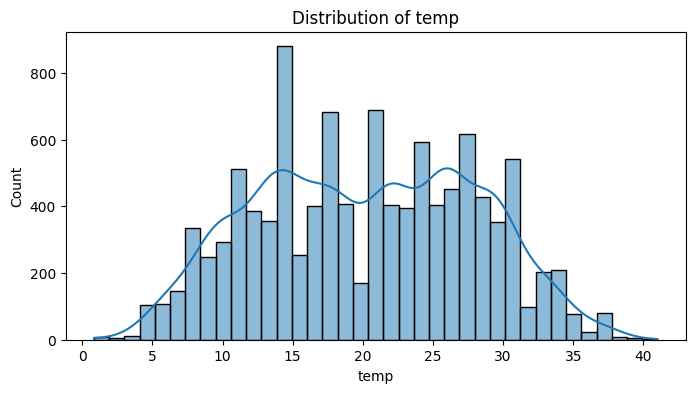

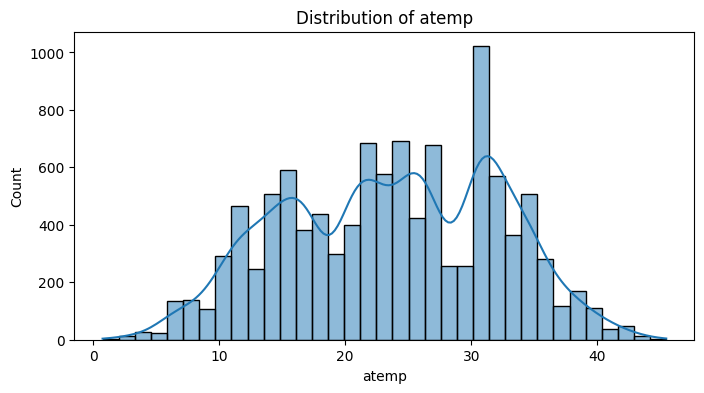

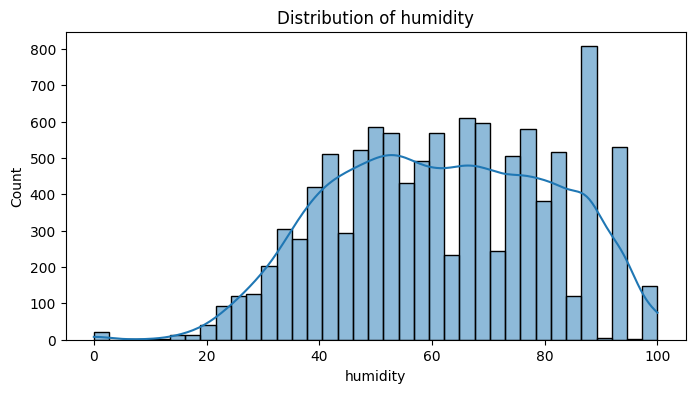

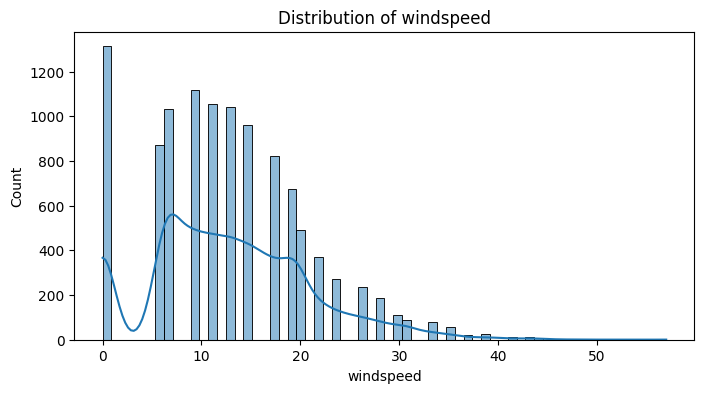

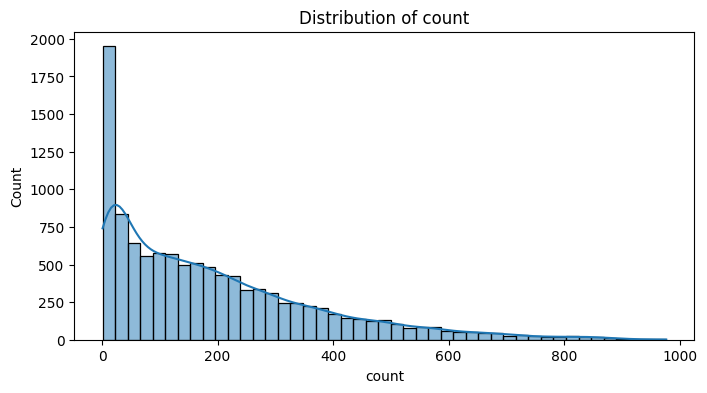

In [ ]:
## Distribution plots for continuous variables
continuous_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

for var in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()


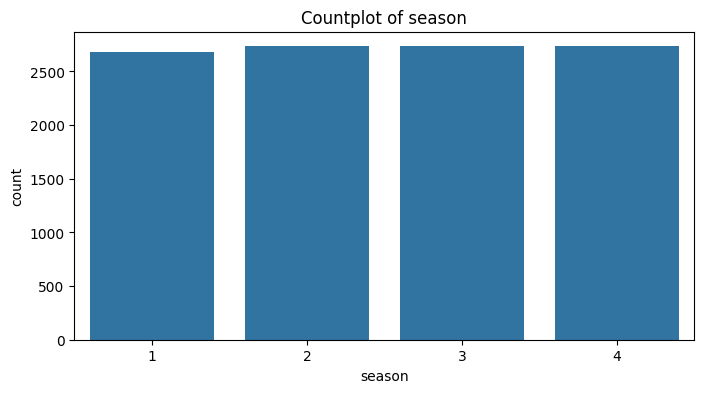

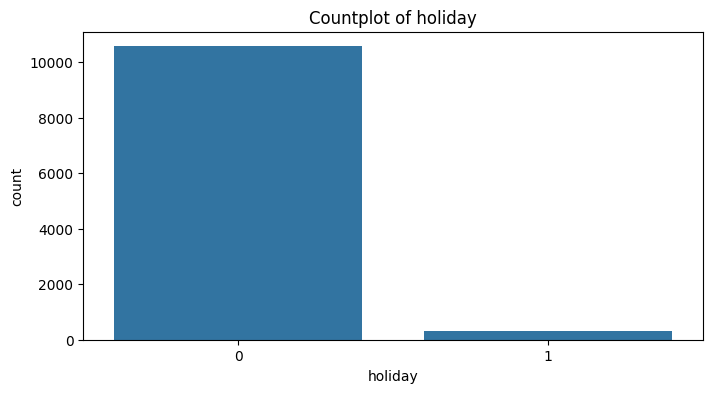

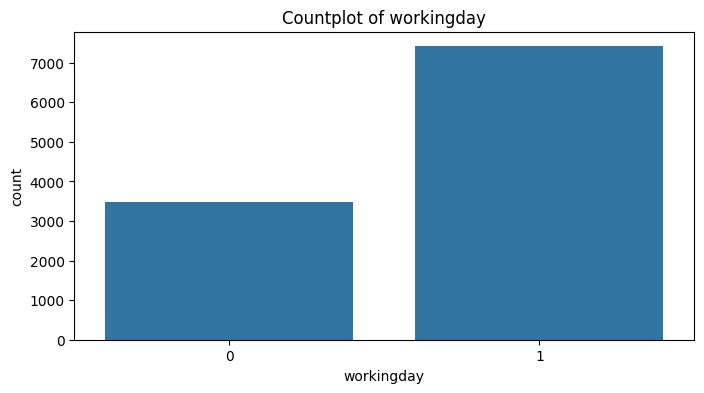

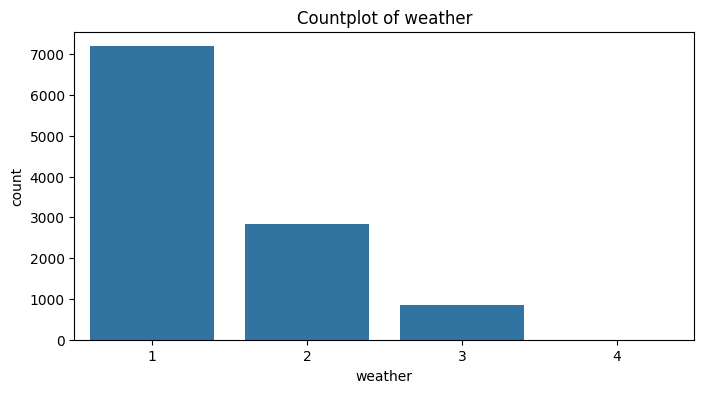

In [ ]:
## Barplots for categorical variables
categorical_vars = ['season', 'holiday', 'workingday', 'weather']

for var in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=var, data=df)
    plt.title(f'Countplot of {var}')
    plt.show()

**3. Bivariate Analysis**

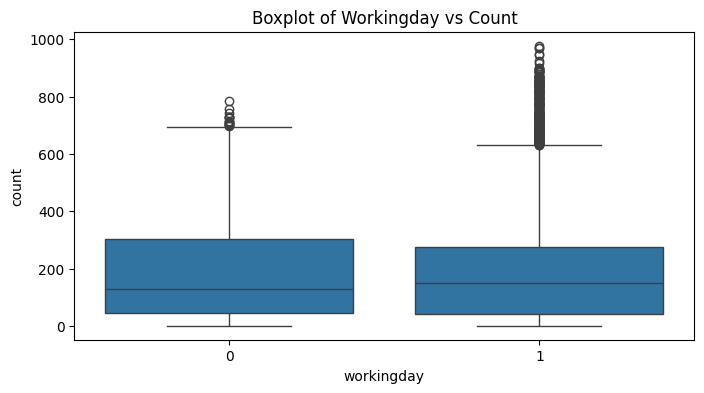

In [ ]:
## Relationship between 'workingday' and 'count'
plt.figure(figsize=(8, 4))
sns.boxplot(x='workingday', y='count', data=df)
plt.title('Boxplot of Workingday vs Count')
plt.show()

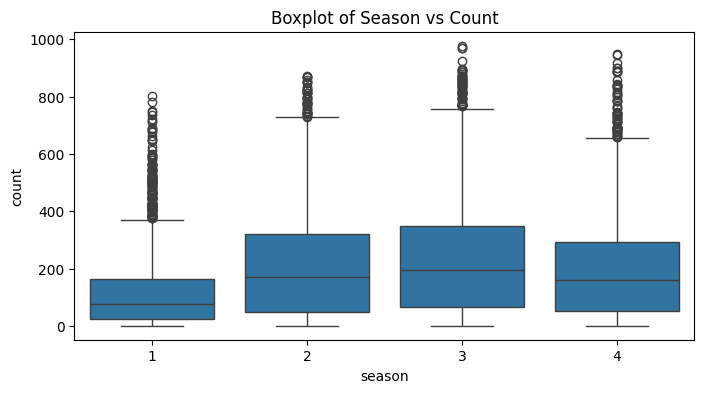

In [ ]:
## Relationship between 'season' and 'count'
plt.figure(figsize=(8, 4))
sns.boxplot(x='season', y='count', data=df)
plt.title('Boxplot of Season vs Count')
plt.show()

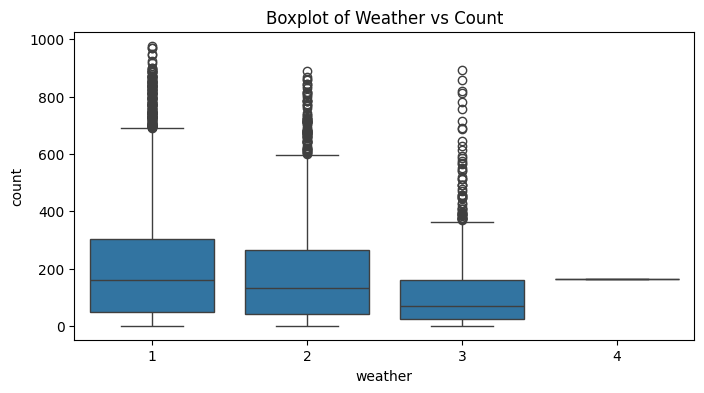

In [ ]:
## Relationship between 'weather' and 'count'
plt.figure(figsize=(8, 4))
sns.boxplot(x='weather', y='count', data=df)
plt.title('Boxplot of Weather vs Count')
plt.show()

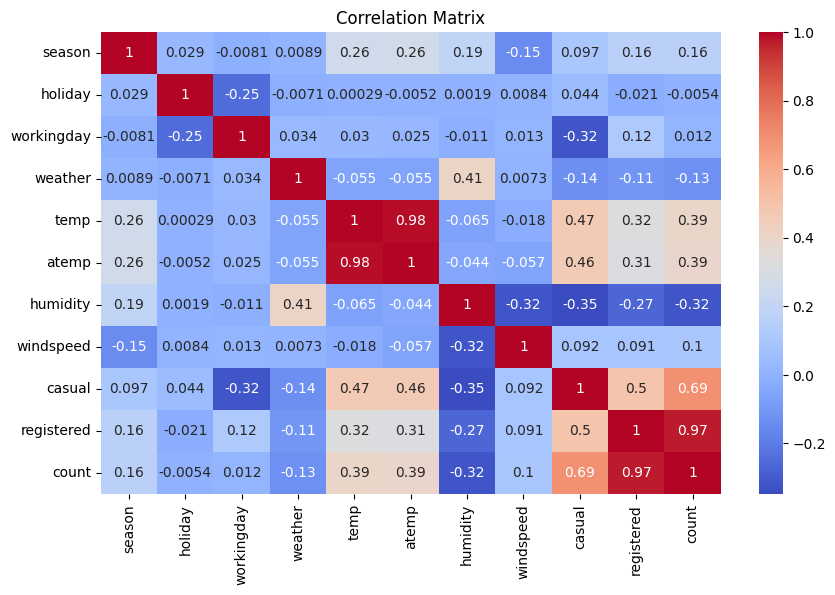

In [ ]:
# Exclude 'datetime' column for correlation matrix
correlation_matrix = df.drop(columns=['datetime']).corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**4. Outlier Detection and Handling**

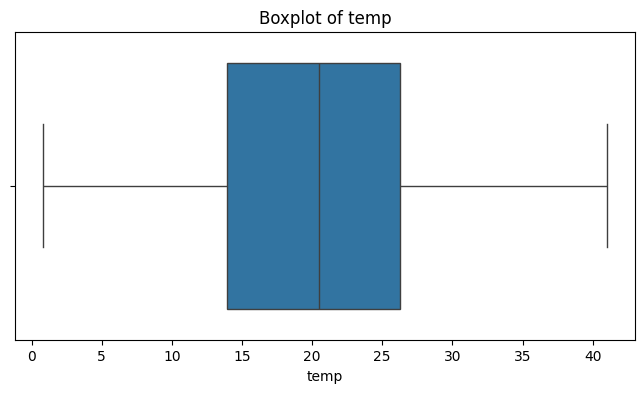

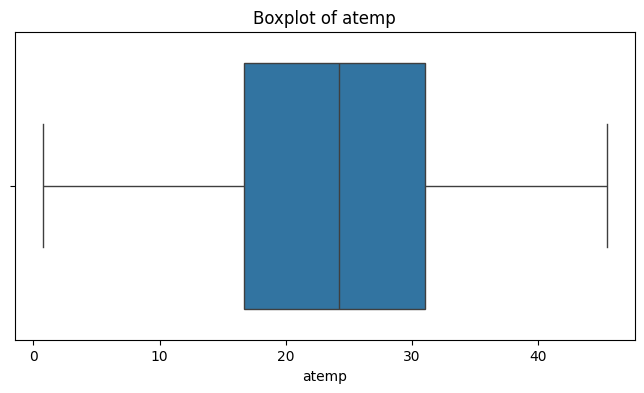

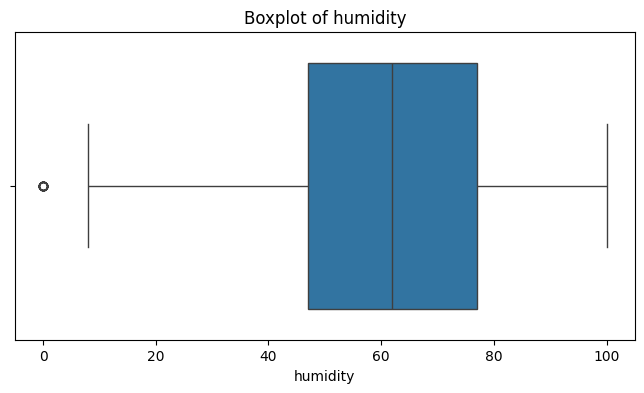

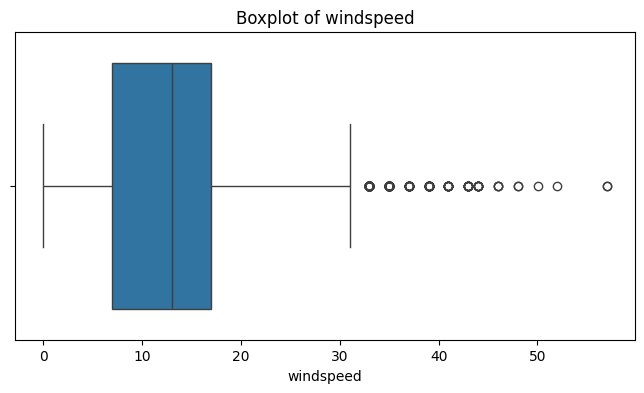

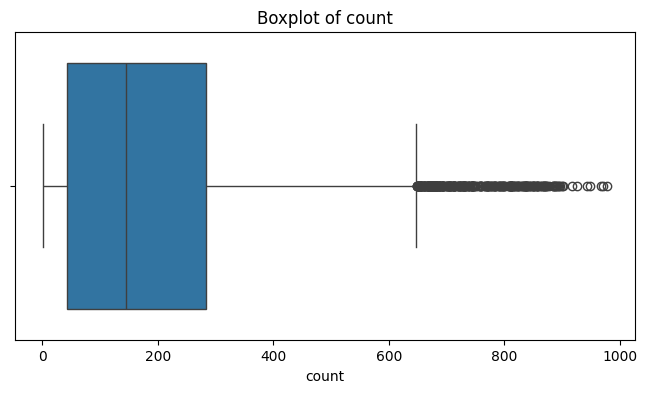

In [ ]:
## Boxplots for detecting outliers in continuous variables
for var in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot of {var}')
    plt.show()

# **5. Insights Summary**

#### Data Quality
- The dataset is clean with no missing values, and the data types are appropriate for analysis.

#### Distribution of Variables
- **Continuous Variables**: `temp`, `atemp`, `humidity`, and `windspeed` show varying degrees of skewness.
- **Categorical Variables**: `season`, `holiday`, `workingday`, and `weather` have distinct distributions, with some categories being more frequent than others.

#### Relationships
- **Workingday**: There is a higher median count of rentals on working days.
- **Season**: Rental counts vary across seasons, with Fall having the highest median count.
- **Weather**: Rental counts decrease as weather conditions worsen.

#### Correlations
- **Strong Positive Correlations**:
  - Between `registered` and `count`.
  - Between `casual` and `count`.
  - Between `temp` and `atemp`.
- **Moderate Negative Correlations**:
  - Between `humidity` and `temp`.
  - Between `humidity` and `atemp`.

#### Outliers
- Outliers are present in several continuous variables, which may need to be addressed depending on the modeling approach.


## **Hypothesis Testing**

---

### **Hypothesis Testing: The Effect of Working Day on the Number of Electric Cycles Rented**

#### 1. Formulate Hypotheses

We want to test whether `Workingday` has an effect on the number of electric cycles rented. The hypotheses are as follows:

- **Null Hypothesis (H₀):** Working Day does not have an effect on the number of electric cycles rented.
  \[
  H₀: \mu_{\text{working day}} = \mu_{\text{non-working day}}
  \]

- **Alternative Hypothesis (H₁):** Working Day does have an effect on the number of electric cycles rented.
  \[
  H₁: \mu_{\text{working day}} \neq \mu_{\text{non-working day}}
  \]

---

#### 2. Choose a Significance Level

We choose a significance level (\(\alpha\)) of 0.05. This means we are willing to accept a 5% chance of incorrectly rejecting the null hypothesis.

---

#### 3. Select the Appropriate Test

Since we are comparing the means of two independent groups (Working Day vs. Non-Working Day), we'll use an **Independent Samples t-test**.

---

#### 4. Check Assumptions

Before conducting the t-test, we need to check the following assumptions:

- **Normality:** The data in each group should be approximately normally distributed.
- **Homogeneity of Variances:** The variance within each group should be similar.


In [1]:
import pandas as pd
from scipy import stats

# Load the dataset
data = pd.read_csv('bike_sharing.txt')

# Separate the data into two groups based on Workingday
workingday_data = data[data['workingday'] == 1]['count']
non_workingday_data = data[data['workingday'] == 0]['count']

# Check for normality (using Shapiro-Wilk test)
shapiro_workingday = stats.shapiro(workingday_data)
shapiro_non_workingday = stats.shapiro(non_workingday_data)

print(f'\nShapiro-Wilk Test for Working Day: {shapiro_workingday}')
print(f'Shapiro-Wilk Test for Non-Working Day: {shapiro_non_workingday}\n')

# Check for homogeneity of variances (using Levene's test)
levene_test = stats.levene(workingday_data, non_workingday_data)
print(f'\nLevene’s Test for Homogeneity of Variances: {levene_test}\n')

# Perform the independent samples t-test
t_test_result = stats.ttest_ind(workingday_data, non_workingday_data)
print(f'\nt-test result: {t_test_result}\n')

# Interpretation
alpha = 0.05
if t_test_result.pvalue < alpha:
    print("\nReject the null hypothesis: Working Day has a significant effect on the number of electric cycles rented.\n")
else:
    print("\nFail to reject the null hypothesis: Working Day does not have a significant effect on the number of electric cycles rented.\n\n")



Shapiro-Wilk Test for Working Day: ShapiroResult(statistic=0.8702545795617624, pvalue=2.2521124830019574e-61)
Shapiro-Wilk Test for Non-Working Day: ShapiroResult(statistic=0.885211755076074, pvalue=4.4728547627911074e-45)


Levene’s Test for Homogeneity of Variances: LeveneResult(statistic=0.004972848886504472, pvalue=0.9437823280916695)


t-test result: TtestResult(statistic=1.2096277376026694, pvalue=0.22644804226361348, df=10884.0)


Fail to reject the null hypothesis: Working Day does not have a significant effect on the number of electric cycles rented.




/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7412.
  res = hypotest_fun_out(*samples, **kwds)


### **Conclusion**

Given the results of the above hypothesis testing:

- The **Shapiro-Wilk test** indicates that the data is not normally distributed, but the large sample size allows us to continue with the t-test.
- **Levene's test** confirms that the variance between the two groups is similar, validating our use of the t-test.
- The **independent samples t-test** shows that there is no significant difference in the mean number of electric cycles rented between Working Days and Non-Working Days.


### **Hypothesis Testing: Number of Cycles Rented Across Different Seasons and Weather Conditions**

#### **1. Formulate Hypotheses**

We want to test whether the number of cycles rented differs significantly across different seasons and weather conditions. The hypotheses for each ANOVA test are as follows:

- **For Seasons:**
  - **Null Hypothesis (H₀):** The mean number of cycles rented is the same across all seasons.
    \[
    H₀: \mu_{\text{Spring}} = \mu_{\text{Summer}} = \mu_{\text{Fall}} = \mu_{\text{Winter}}
    \]
  
  - **Alternative Hypothesis (H₁):** The mean number of cycles rented differs across at least one of the seasons.
    \[
    H₁: \text{At least one season's mean is different from the others.}
    \]

- **For Weather Conditions:**
  - **Null Hypothesis (H₀):** The mean number of cycles rented is the same across all weather conditions.
    \[
    H₀: \mu_{\text{weather 1}} = \mu_{\text{weather 2}} = \mu_{\text{weather 3}} = \mu_{\text{weather 4}}
    \]
  
  - **Alternative Hypothesis (H₁):** The mean number of cycles rented differs across at least one of the weather conditions.
    \[
    H₁: \text{At least one weather condition's mean is different from the others.}
    \]

---

#### **2. Choose a Significance Level**

We choose a significance level (\(\alpha\)) of 0.05. This means that we are willing to accept a 5% chance of incorrectly rejecting the null hypothesis.

---

#### **3. Select the Appropriate Test**

Since we are comparing the means of multiple groups (seasons and weather conditions), we'll use a **one-way ANOVA** (Analysis of Variance).

---

#### **4. Check Assumptions**

Before conducting the ANOVA test, we need to check the following assumptions:

- **Normality:** The data in each group should be approximately normally distributed.
- **Homogeneity of Variances:** The variance within each group should be similar.
- **Independence:** The observations should be independent of each other.

---

#### **5. Perform ANOVA**

Now, let's write the code to perform the ANOVA test for seasons and weather conditions.




In [2]:
import pandas as pd
from scipy import stats

# Load the dataset
data = pd.read_csv('bike_sharing.txt')

# ANOVA for Seasons
anova_season = stats.f_oneway(
    data[data['season'] == 1]['count'],  # Spring
    data[data['season'] == 2]['count'],  # Summer
    data[data['season'] == 3]['count'],  # Fall
    data[data['season'] == 4]['count']   # Winter
)

# ANOVA for Weather Conditions
anova_weather = stats.f_oneway(
    data[data['weather'] == 1]['count'],  # Clear
    data[data['weather'] == 2]['count'],  # Mist
    data[data['weather'] == 3]['count'],  # Light Snow, Light Rain
    data[data['weather'] == 4]['count']   # Heavy Rain, Ice Pallets, etc.
)

print(f'ANOVA result for Seasons: {anova_season}')
print(f'ANOVA result for Weather Conditions: {anova_weather}')

# Interpretation
alpha = 0.05
if anova_season.pvalue < alpha:
    print("\nReject the null hypothesis: The number of cycles rented differs significantly across different seasons.\n")
else:
    print("\nFail to reject the null hypothesis: The number of cycles rented is similar across different seasons.\n")

if anova_weather.pvalue < alpha:
    print("\nReject the null hypothesis: The number of cycles rented differs significantly across different weather conditions.\n")
else:
    print("\nFail to reject the null hypothesis: The number of cycles rented is similar across different weather conditions.\n")


ANOVA result for Seasons: F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)
ANOVA result for Weather Conditions: F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

Reject the null hypothesis: The number of cycles rented differs significantly across different seasons.


Reject the null hypothesis: The number of cycles rented differs significantly across different weather conditions.



### **Conclusion**

Based on the results of the ANOVA tests:

- **For Seasons:**
  - The ANOVA test yielded a p-value of approximately \(6.16 \times 10^{-149}\), which is significantly lower than the chosen significance level of 0.05.
  - **Conclusion:** We reject the null hypothesis. This indicates that the number of cycles rented differs significantly across different seasons. Therefore, the season has a significant effect on the number of cycles rented.

- **For Weather Conditions:**
  - The ANOVA test yielded a p-value of approximately \(5.48 \times 10^{-42}\), which is also significantly lower than the chosen significance level of 0.05.
  - **Conclusion:** We reject the null hypothesis. This indicates that the number of cycles rented differs significantly across different weather conditions. Therefore, the weather condition has a significant effect on the number of cycles rented.

---

In summary, both the season and weather conditions significantly influence the number of cycles rented. The variations in the number of rentals can be attributed to changes in seasons and weather conditions.


### **Hypothesis Testing: Dependency of Weather on Season**

#### 1. Formulate Hypotheses

We want to test whether the `Weather` is dependent on the `Season`. The hypotheses are as follows:

- **Null Hypothesis (H₀):** Weather is independent of the season.
  
  \[
  H₀: \text{Weather and Season are independent.}
  \]

- **Alternative Hypothesis (H₁):** Weather is dependent on the season.
  
  \[
  H₁: \text{Weather and Season are dependent.}
  \]

---

#### 2. Choose a Significance Level

We choose a significance level (\(\alpha\)) of 0.05. This means that we are willing to accept a 5% chance of incorrectly rejecting the null hypothesis.

---

#### 3. Select the Appropriate Test

Since we are checking the relationship between two categorical variables (`Weather` and `Season`), we'll use a **Chi-square test of independence**.

---

#### 4. Check Assumptions

Before conducting the Chi-square test, we need to check the following assumptions:

- **Independence of Observations:** The observations should be independent of each other.
- **Expected Frequency:** Each expected frequency should be at least 5 for all categories in the contingency table.



---




#### 5. Perform the Test and Interpret the Results




In [7]:
import pandas as pd
from scipy import stats
from scipy.stats import chi2_contingency

# Load the dataset
df = pd.read_csv('bike_sharing.txt')

# Create a contingency table
contingency_table = pd.crosstab(df['season'], df['weather'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-square Statistic: {chi2}\n")
print(f"P-value: {p}\n")
print(f"Degrees of Freedom: {dof}\n")
print(f"Expected Frequencies Table:\n{expected}\n")

# Interpretation
if p < 0.05:
    print("Reject the null hypothesis: Weather is dependent on the season.\n")
else:
    print("Fail to reject the null hypothesis: Weather is independent of the season.")


Chi-square Statistic: 49.158655596893624

P-value: 1.549925073686492e-07

Degrees of Freedom: 9

Expected Frequencies Table:
[[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]

Reject the null hypothesis: Weather is dependent on the season.



### **Conclusion**

Based on the results of the Chi-square test for the dependency of weather on season:

- **Chi-square Statistic:** 49.159
- **P-value:** 1.55e-07
- **Degrees of Freedom:** 9

**Conclusion:**

- The Chi-square test yielded a p-value of approximately \(1.55 \times 10^{-7}\), which is significantly lower than the chosen significance level of 0.05.
- **Conclusion:** We reject the null hypothesis. This indicates that the weather conditions are significantly dependent on the season. Therefore, the distribution of weather conditions varies across different seasons.

---

In summary, the results suggest a significant relationship between weather and season. The variability in weather conditions is associated with different seasons, highlighting the dependence of weather on seasonal changes.


# Project Recommendations for Yulu's Shared Electric Cycles

## Overview

Yulu, India’s leading micro-mobility service provider, has been experiencing a decline in revenues. The company aims to understand the factors affecting the demand for their shared electric cycles. This report provides insights and recommendations based on the data analysis conducted.

## Insights

### 1. Data Quality
- **Missing Values**: The dataset is clean with no missing values.
- **Data Types**: Data types are appropriate for analysis.

### 2. Distribution of Variables
- **Continuous Variables**:
  - `temp`, `atemp`, `humidity`, and `windspeed` exhibit varying degrees of skewness.
- **Categorical Variables**:
  - `season`, `holiday`, `workingday`, and `weather` show distinct distributions with some categories being more frequent.

### 3. Relationships
- **Workingday**: Higher median count of rentals on working days compared to non-working days.
- **Season**: Fall has the highest median count of rentals.
- **Weather**: Rental counts decrease with worsening weather conditions.

### 4. Correlations
- **Strong Positive Correlations**:
  - `registered` and `count`
  - `casual` and `count`
  - `temp` and `atemp`
- **Moderate Negative Correlations**:
  - `humidity` and `temp`
  - `humidity` and `atemp`

### 5. Outliers
- Outliers are present in several continuous variables. Depending on the modeling approach, outliers may need to be addressed.

## Recommendations

### 1. Focus on Working Days
- **Action**: Increase marketing and promotions targeting working days. Consider special offers or discounts for users on these days.

### 2. Seasonal Strategies
- **Action**: Implement seasonal promotions, particularly targeting Fall when the demand is highest. Adjust pricing and availability based on seasonal trends.

### 3. Weather-Related Adjustments
- **Action**: Develop strategies for adverse weather conditions, such as improved bike maintenance and better weather protection for bikes. Consider introducing weather-based pricing adjustments.

### 4. Address Outliers
- **Action**: Investigate outliers in continuous variables and assess their impact. Decide on appropriate methods to handle outliers in the modeling phase.

### 5. Enhance Model Features
- **Action**: Incorporate additional features such as local events or holidays that may affect demand. Consider advanced modeling techniques to better capture the effects of various factors on demand.

## Next Steps
1. **Model Development**: Build and validate predictive models using significant variables.
2. **Implementation**: Develop and execute targeted marketing and operational strategies based on the insights.
3. **Monitoring**: Continuously monitor the impact of implemented strategies and adjust as needed.

---

By following these recommendations, Yulu can better understand the demand dynamics and take targeted actions to address revenue decline.
